# 单变量线性回归

要学习的线性函数：y = 2x + 1

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.7.0


In [273]:
# 生成人工训练数据
x_data = np.linspace(-1, 1, 100)

np.random.seed(5)

# 目标函数后追加噪声
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

In [274]:
# 查看当前生成数据集
print("x", x_data)

print("y", y_data)

x [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  

Text(0.5, 1.0, 'Figure: Training Data')

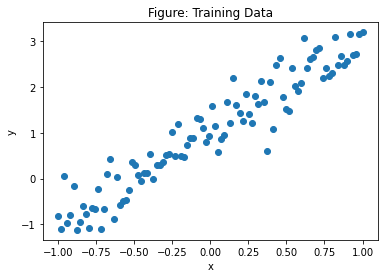

In [275]:
# 随机数据散点图
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure: Training Data")

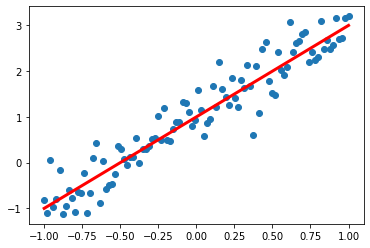

In [276]:
# 随机数据散点图
plt.scatter(x_data, y_data)

# 目标函数图：y = 2x + 1
plt.plot(x_data, 2 * x_data + 1.0, "r", linewidth=3)

In [277]:
# 构建回归模型
# y = 2x + 1
# y = (w)x + (b)
# 其中，w与b 均为待训练值
def model(x, w, b):
    return tf.multiply(x, w) + b

In [278]:
# 构建函数模型中的w，对应函数斜率
w = tf.Variable(np.random.randn(), tf.float32)

# 构建函数模型中的b，对应函数截距
b = tf.Variable(0.0, tf.float32)

In [279]:
# 定义损失函数
# 此处采用均方差损失函数
def loss(x, y, w, b):
    # 计算模型预测值与标签值的差异
    err = model(x, w, b) - y

    # 求平方，得出方差
    square_err = tf.square(err)

    # 求均值，得出均方差
    return tf.reduce_mean(square_err)

In [280]:
# 训练模型

# 设置超参数
# 迭代次数
training_epochs = 10

# 采用小批量梯度下降迭代次数
new_training_epochs = 1000

# 学习率
learning_rate = 0.01

In [281]:
# 定义梯度下降函数（对比 1.0 中的梯度下降优化器）
# 在TF2.0中，采用tf.GradientTape()这一上下文管理器封装需要求导的步骤，并使用tape.gradient()方法求导
# 计算样本数据[x, y]在参数[w, b]点上的梯度（求导）
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)

    # 返回梯度向量
    return tape.gradient(loss_, [w, b])

In [282]:
# # 开始训练（随机梯度下降法，SGD）
# # 记录训练步数
# step = 0
#
# # 记录loss值的列表
# loss_list = []
#
# # 控制训练过程数据显示的频率，不是超参数
# display_step = 10
#
# for epoch in range(training_epochs):
#     for xs, ys in zip(x_data, y_data):
#         # 计算损失
#         loss_ = loss(xs, ys, w, b)
#
#         # 保存本次损失结果
#         loss_list.append(loss_)
#
#         # 计算该当前[w, b]的梯度
#         delta_w, delta_b = grad(xs, ys, w, b)
#
#         # 计算变量w需要调整的值（求导后的值）
#         change_w = delta_w * learning_rate
#
#         # 计算变量b需要调整的值（求导后的值）
#         change_b = delta_b * learning_rate
#
#         # 变量w值变更为减去change_w后的值
#         w.assign_sub(change_w)
#
#         # 变量b值变更为减去change_b后的值
#         b.assign_sub(change_b)
#
#         # 训练步数 + 1
#         step += 1
#
#         # 显示训练过程
#         if (step % display_step) == 0:
#             print("Training Epoch: ", '%02d' % (epoch + 1), "Step: %03d" % (step), "loss=%0.6f" % (loss_))
#
#         # 完成一轮训练后，绘图
#     plt.plot(x_data, w.numpy() * x_data + b.numpy())

Training Epoch:  01 loss=1.713499
Training Epoch:  02 loss=1.664164
Training Epoch:  03 loss=1.616606
Training Epoch:  04 loss=1.570757
Training Epoch:  05 loss=1.526552
Training Epoch:  06 loss=1.483928
Training Epoch:  07 loss=1.442824
Training Epoch:  08 loss=1.403184
Training Epoch:  09 loss=1.364950
Training Epoch:  10 loss=1.328070
Training Epoch:  11 loss=1.292492
Training Epoch:  12 loss=1.258167
Training Epoch:  13 loss=1.225046
Training Epoch:  14 loss=1.193086
Training Epoch:  15 loss=1.162241
Training Epoch:  16 loss=1.132470
Training Epoch:  17 loss=1.103731
Training Epoch:  18 loss=1.075987
Training Epoch:  19 loss=1.049200
Training Epoch:  20 loss=1.023333
Training Epoch:  21 loss=0.998352
Training Epoch:  22 loss=0.974225
Training Epoch:  23 loss=0.950918
Training Epoch:  24 loss=0.928402
Training Epoch:  25 loss=0.906647
Training Epoch:  26 loss=0.885624
Training Epoch:  27 loss=0.865306
Training Epoch:  28 loss=0.845667
Training Epoch:  29 loss=0.826683
Training Epoch

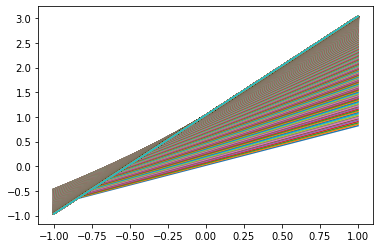

In [283]:
# 采用全批量梯度下降法（BGD）做训练

# 记录loss值的列表
loss_list = []

for epoch in range(new_training_epochs):
    # 计算损失
    loss_ = loss(x_data, y_data, w, b)

    # 保存本次损失结果
    loss_list.append(loss_)

    # 计算该当前[w, b]的梯度
    delta_w, delta_b = grad(x_data, y_data, w, b)

    # 计算变量w需要调整的值（求导后的值）
    change_w = delta_w * learning_rate

    # 计算变量b需要调整的值（求导后的值）
    change_b = delta_b * learning_rate

    # 变量w值变更为减去change_w后的值
    w.assign_sub(change_w)

    # 变量b值变更为减去change_b后的值
    b.assign_sub(change_b)

    # 显示训练过程
    print("Training Epoch: ", '%02d' % (epoch + 1), "loss=%0.6f" % (loss_))

    # 完成一轮训练后，绘图
    plt.plot(x_data, w.numpy() * x_data + b.numpy())

In [284]:
print("w", w.numpy())
print("b", b.numpy())

w 2.0039713
b 1.0366157


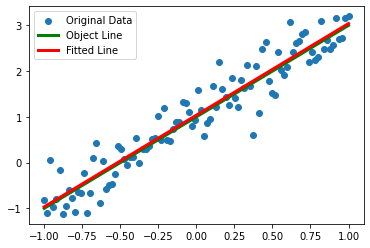

In [285]:
# 结果可视化
plt.scatter(x_data, y_data, label="Original Data")
plt.plot(x_data, 2.0 * x_data + 1.0, label="Object Line", color="g", linewidth=3)
plt.plot(x_data, w.numpy() * x_data + b.numpy(), label="Fitted Line", color="r", linewidth=3)
plt.legend(loc=2)

In [286]:
x_test = 3.21

predict = model(x_test, w.numpy(), b.numpy())
print("预测值: %f" % predict)

target = 2 * x_test + 1.0
print("目标值: %f" % target)

预测值: 7.469364
目标值: 7.420000


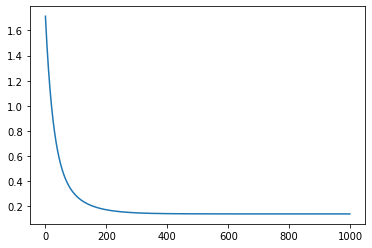

In [287]:
# 查看损失变化情况
plt.plot(loss_list)